This notebook explores an example using data from the ENIGMA Addiction Consortium. Within this notebook we will be trying to predict between participents with any drug dependence (alcohol, cocaine, etc...), vs. healthy controls. The data for this is sources from a number of individual studies from all around the world and with different scanners etc... making this a challenging problem with its own unique considerations. Freesurfer structural ROIs are used.

In [1]:
from BPt import BPt_ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will start by just performing some very dataset specific loading.

In [2]:
d1 = pd.read_excel('/home/sage/Downloads/e1.xlsx')
d2 = pd.read_excel('/home/sage/Downloads/e2.xlsx')
df = pd.concat([d1, d2])

df['Subject'] = df['Subject'].astype('str')

df2 = pd.read_excel('/home/sage/Downloads/e3.xlsx')
df2['Subject ID'] = df2['Subject ID'].astype('str')

Next we set up our BPt_ML object and set some default loading params.

In [3]:
ML = BPt_ML('Enigma_Alc',
             log_dr = None,
              n_jobs = 16)

ML.Set_Default_Load_Params(subject_id = 'Subject',
                           na_values = [' ', '  ', 'nan', 'NaN'],
                           drop_na = .5)

exp_name = Enigma_Alc
log_dr = None
existing_log = append
verbose = True
exp log dr setup at: None
log file at: None
Default params set:
notebook = True
use_abcd_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 534
n_jobs = 16
dpi = 100
mp_context = spawn
BPt_ML object initialized
Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: Subject
eventname: None
eventname_col: eventname
overlap_subjects: False
merge: inner
na_values: [' ', '  ', 'nan', 'NaN']
drop_na: 0.5
drop_or_na: drop



Next we will load and visualize the neuroimaging freesurfer ROIs

In [4]:
ML.Load_Data(df = df,
             drop_keys = ['Unnamed:', 'Site', 'Half', 'PI', 'Dependent',
                          'Surface Area', 'Thickness', 'ICV', 'Subcortical',
                          'Sex', 'Age', 'Primary Drug'],
             inclusion_keys = None,
             unique_val_warn=None,
             clear_existing=True)

ML.Show_Data_Dist()

Cleared loaded data.

Loading from df or files

Dropped 55 columns per passed drop_keys argument
Dropped 0 cols for all missing values
Dropped 38 rows for missing values, based on the provided drop_na param: 0.5 with actual na_thresh: 77
Loaded rows with NaN remaining: 508
Loaded NaN Info:
There are: 8937 total missing values
17 columns found with 3 missing values (column name overlap: ['_thickavg'])
14 columns found with 4 missing values (column name overlap: ['_thickavg'])
13 columns found with 103 missing values (column name overlap: ['_surfavg'])
11 columns found with 102 missing values (column name overlap: ['urf'])
10 columns found with 5 missing values (column name overlap: ['_thickavg'])
8 columns found with 104 missing values (column name overlap: ['_surfavg'])
6 columns found with 105 missing values (column name overlap: ['_surfavg'])
6 columns found with 101 missing values (column name overlap: ['urf'])
6 columns found with 106 missing values (column name overlap: ['_surfavg

Our target variable is drug dependence

Loading from df or files
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: 0.5 with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: Dependent any drug
10

Loaded Shape: (3046, 1)
All loaded targets
0 : Dependent any drug

Set to overlapping loaded subjects.
-- Dependent any drug --


,Original_Name,Counts,Frequency
Internal_Name,,,
0,0,1102,0.366356
1,1,1906,0.633644


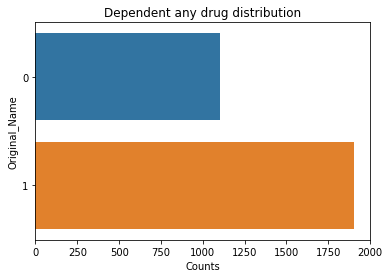

In [5]:
ML.Load_Targets(df = df,
                col_name = 'Dependent any drug',
                data_type = 'b')
ML.Show_Targets_Dist()

We will load the rest of the non neuroimaging data as Covars according to their data type

cleared covars.

Loading from df or files
Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 111
loading: ICV
loading: Sex
loading: Age
Loaded Shape: (3046, 3)
Loading from df or files
Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 1314
loading: Education
Filtering for outliers by stds: (10, 10)
Min-Max value (pre-filter): 1.0 135.0
Min-Max value (post outlier filtering): 1.0 33.0
loading: Handedness
Dropped 1 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...
Loaded Shape: (3420, 2)
Merged with existing (merge=inner)
New combined shape: (2941, 5)
Set to overlapping loaded subjects.
-- ICV --


,ICV
count,2899.000
mean,14.744
std,2.322
min,7.476
25%,13.282
50%,14.912
75%,16.400
max,20.700
median,14.912
skew,-0.358


Note: 8 subject(s) with NaN not included/shown!


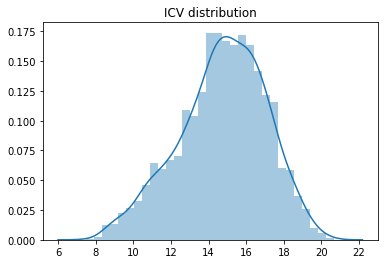


-- Sex --


,Original_Name,Counts,Frequency
Internal_Name,,,
0,1.0,1794,0.635044
1,2.0,1031,0.364956


Note: 82 subject(s) with NaN not included/shown!


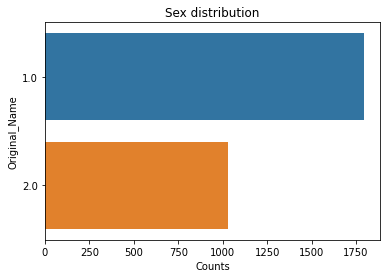


-- Age --


,Age
count,2812.000
mean,31.698
std,10.442
min,14.000
25%,23.000
50%,29.000
75%,40.000
max,68.000
median,29.000
skew,0.607


Note: 95 subject(s) with NaN not included/shown!


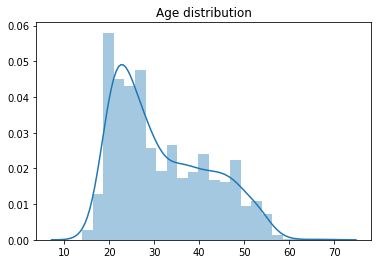


-- Education --


,Education
count,2250.000
mean,13.118
std,3.923
min,1.000
25%,12.000
50%,13.000
75%,16.000
max,33.000
median,13.000
skew,-1.187


Note: 657 subject(s) with NaN not included/shown!


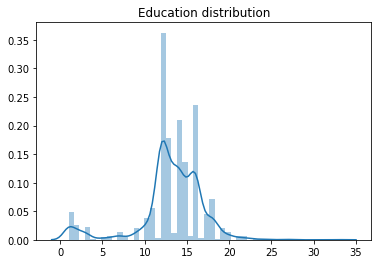


-- Handedness --


,Original_Name,Counts,Frequency
Internal_Name,,,
0,1.0,2256,0.958369
1,2.0,98,0.041631


Note: 553 subject(s) with NaN not included/shown!


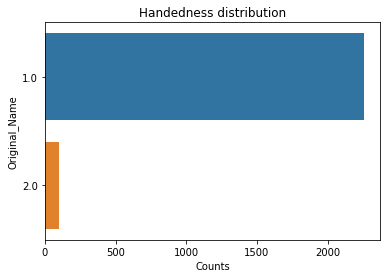

In [6]:
ML.Clear_Covars()

ML.Load_Covars(df=df,
               col_name = ['ICV', 'Sex', 'Age'],
               drop_na = False,
               data_type = ['f', 'b', 'f'])

ML.Load_Covars(df = df2,
               col_name = ['Education', 'Handedness'],
               data_type = ['f', 'b'],
               drop_na = False,
               subject_id = 'Subject ID',
               filter_outlier_std = 10)

ML.Show_Covars_Dist()

We will make use of the Site variable, as a non-input stratification value.

In [7]:
# Also load sex as Strat
ML.Load_Strat(df=df,
              col_name=['Sex', 'Site'],
              binary_col=[True, False]
              )

Loading from df or files
Dropped 0 cols for all missing values
Dropped 85 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Loaded Shape: (2961, 2)


Calling Prepare_All_Data sets up our data for modelling

In [8]:
ML.Prepare_All_Data()

Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (2825, 162)


We can look at how many NaN values we have still present in the data to be imputed.

In [9]:
np.sum(np.sum(ML.all_data.isnull()))

2648

Next we will make use of BPt's CV object to define a custom CV behavior where groups are preserved on Site.

In [10]:
from BPt import CV

group_site_cv = CV(groups='Site')

We can now pass this custom CV object when defining our global train test split, which will inform the train test split by the passed CV behavior

In [11]:
ML.Train_Test_Split(test_size = .2, CV=group_site_cv)

Performing split on 2825 subjects!
random_state: 534
Test split size: 0.2

Performed train test split
Train size: 2117
Test size:  708


Once a train test split has been defined, new visualization functionality is avaliable

Set to overlapping loaded subjects.


,Train,Test
ICV,,
count,2111.000,706.000
mean,15.047,13.702
std,2.192,2.412
min,7.476,8.178
25%,13.700,11.705
50%,15.126,13.900
75%,16.600,15.452
max,20.700,20.506
median,15.126,13.900


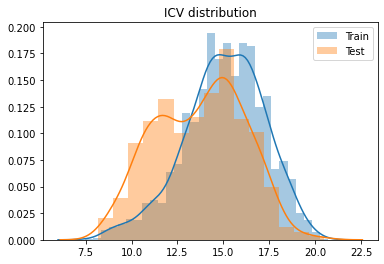

,Original_Name,Counts,Frequency,Split
Internal_Name,,,,
0,1.0,1367,0.645725,Train
1,2.0,750,0.354275,Train
0,1.0,427,0.603107,Test
1,2.0,281,0.396893,Test


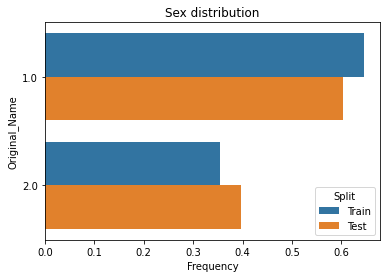

,Train,Test
Age,,
count,2103.000,708.000
mean,31.817,31.326
std,10.574,10.032
min,14.000,16.000
25%,23.000,23.000
50%,29.000,29.000
75%,40.000,39.000
max,68.000,59.000
median,29.000,29.000


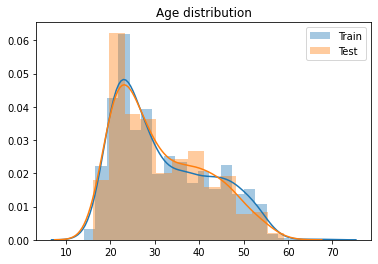

,Train,Test
Education,,
count,1773.000,476.000
mean,12.795,14.318
std,4.158,2.556
min,1.000,8.000
25%,12.000,12.000
50%,13.000,14.000
75%,15.580,16.000
max,33.000,26.000
median,13.000,14.000


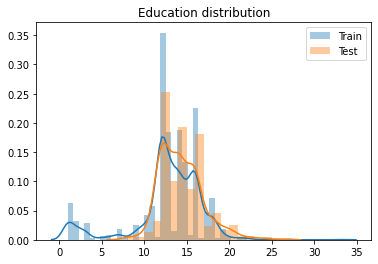

,Original_Name,Counts,Frequency,Split
Internal_Name,,,,
0,1.0,1615,0.952802,Train
1,2.0,80,0.047198,Train
0,1.0,632,0.973806,Test
1,2.0,17,0.026194,Test


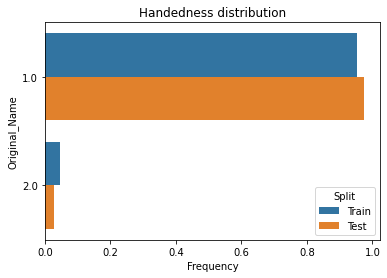

In [12]:
train_dfs = ML.Show_Covars_Dist(subjects='both', cat_type='Frequency', return_display_dfs=True)

Set to overlapping loaded subjects.


,Original_Name,Counts,Frequency,Split
Internal_Name,,,,
0,0,634,0.299480,Train
1,1,1483,0.700520,Train
0,0,368,0.519774,Test
1,1,340,0.480226,Test


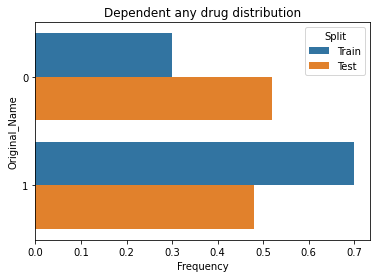

In [13]:
ML.Show_Targets_Dist(subjects='both', cat_type='Frequency')

Plots can be saved (and customized) as seen commented out below

In [14]:
#ML.Show_Targets_Dist(subjects='train', show=False)
#plt.savefig('train_target_dist.png')
#plt.show()
#ML.Show_Targets_Dist(subjects='test', show=False)
#plt.savefig('test_target_dist.png')

Plotting data distribution.
Viewing train data with shape: (2117, 154)
Viewing test data with shape: (708, 154)


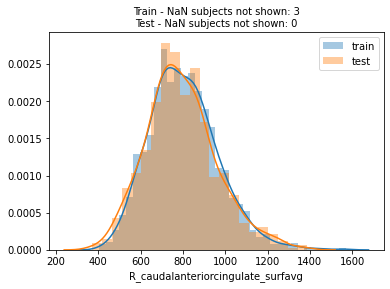

In [15]:
ML.Show_Data_Dist(subjects='both')

## Modelling

The next phase, now that all the data is setup, is to exploreactually modelling

In [16]:
from BPt import Problem_Spec, Model_Pipeline, Imputer, Scaler, Model, Param_Search, Feat_Importance

In [17]:
problem_spec = Problem_Spec(problem_type = 'binary', 
                            scorer = ['matthews', 'roc_auc', 'balanced_accuracy'],
                            n_jobs = 16)
problem_spec               

Problem_Spec(n_jobs=16, problem_type='binary',
             scorer=['matthews', 'roc_auc', 'balanced_accuracy'])

In [18]:
ML.Set_Default_ML_Verbosity(show_init_params=False)

Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
progress_loc: None
compute_train_score: False
show_init_params: False
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: False
best_params: False
save_to_logs: False



In [19]:
model_pipeline =\
    Model_Pipeline(imputers = [Imputer(obj='mean', scope='float'),
                               Imputer(obj='median', scope='cat')],
                   scalers = Scaler('standard'), 
                   model = Model('elastic', params=1),
                   param_search = Param_Search(search_type='DiscreteOnePlusOne', n_iter=64),
                   feat_importances= Feat_Importance(obj='base'))

In [20]:
model_pipeline

Model_Pipeline(feat_importances=Feat_Importance(obj='base', shap_params=None),
               imputers=[Imputer(extra_params={}, obj='mean', scope='float'),
                         Imputer(extra_params={}, obj='median', scope='cat')],
               model=Model(extra_params={}, obj='elastic', params=1),
               param_search=Param_Search(n_iter=64,
                                         search_type='DiscreteOnePlusOne'),
               scalers=Scaler(extra_params={}, obj='standard'))

In [21]:
results = ML.Evaluate(model_pipeline = model_pipeline,
                      problem_spec = problem_spec,
                      splits = 3,
                      n_repeats = 1)




Validation Scores
_________________
Scorer:  matthews
Mean Validation score:  0.4566139968780831
Std in Validation score:  0.008420678551180701

Scorer:  roc_auc
Mean Validation score:  0.818580904918591
Std in Validation score:  0.003797226531110494

Scorer:  balanced_accuracy
Mean Validation score:  0.7444147028681162
Std in Validation score:  0.010878793935591439



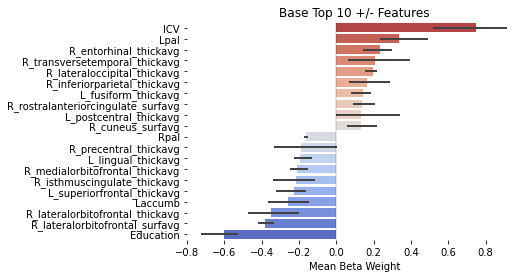

In [22]:
ML.Plot_Global_Feat_Importances()

We can go into a bit more detail and seperate subjects from a site w/ either all control or all case

In [23]:
def check_balanced(df):
    as_int = df['Dependent any drug'].astype('int')
    return np.sum(as_int) != len(as_int)
    
train_data = ML.all_data.loc[ML.train_subjects]
by_site = train_data.groupby('Site_Strat')
is_balanced = by_site.apply(check_balanced)

imbalanced_subjs = []
for b_site in is_balanced[~is_balanced].index:
    imbalanced_subjs += list(train_data[train_data['Site_Strat'] == b_site].index)

balanced_subjs = []
for b_site in is_balanced[is_balanced].index:
    balanced_subjs += list(train_data[train_data['Site_Strat'] == b_site].index)
    print(len(list(train_data[train_data['Site_Strat'] == b_site].index)))

298
41
91
71
53
66
69
137
41
118
30
27
78
59
34


In [24]:
# By defining a CV strategy this way, we are essentially setting a global strategy that will be used
# both in the outer CV folds and inner folds.
ML.Define_Validation_Strategy(train_only_subjects=imbalanced_subjs)

904 Train only subjects defined.


In [25]:
results = ML.Evaluate(model_pipeline = model_pipeline,
                      problem_spec = problem_spec,
                      splits = 3,
                      n_repeats = 1)




Validation Scores
_________________
Scorer:  matthews
Mean Validation score:  0.15225037420289456
Std in Validation score:  0.021046963935772503

Scorer:  roc_auc
Mean Validation score:  0.6293381707594926
Std in Validation score:  0.011148355382962322

Scorer:  balanced_accuracy
Mean Validation score:  0.5709401477134345
Std in Validation score:  0.007639179237382912



## Try w/ removing subjects

In [26]:
problem_spec.subjects = balanced_subjs

In [27]:
results = ML.Evaluate(model_pipeline = model_pipeline,
                      problem_spec = problem_spec,
                      splits = 3,
                      n_repeats = 1)




Validation Scores
_________________
Scorer:  matthews
Mean Validation score:  0.2571406309977982
Std in Validation score:  0.04332988481650662

Scorer:  roc_auc
Mean Validation score:  0.6725772344750429
Std in Validation score:  0.025999625475636546

Scorer:  balanced_accuracy
Mean Validation score:  0.6253367665153838
Std in Validation score:  0.02072262440071329



In [28]:
problem_spec.weight_metric = True
results = ML.Evaluate(model_pipeline = model_pipeline,
                      problem_spec = problem_spec,
                      splits = 'Site',
                      n_repeats = 1)




Validation Scores
_________________
Scorer:  matthews
Mean Validation score:  0.14483742692873663
Std in Validation score:  0.19524095703049385

Scorer:  roc_auc
Mean Validation score:  0.6279106565064901
Std in Validation score:  0.10647783652748663

Scorer:  balanced_accuracy
Mean Validation score:  0.5717584001421138
Std in Validation score:  0.0834342705622324



In [29]:
problem_spec.subjects = 'all'
results = ML.Evaluate(model_pipeline = model_pipeline,
                      problem_spec = problem_spec,
                      splits = 'Site',
                      n_repeats = 1)

/home/sage/anaconda3/envs/home/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)





Validation Scores
_________________
Scorer:  matthews
Mean Validation score:  0.11072149002257087
Std in Validation score:  0.08674505226424052

Scorer:  roc_auc
Mean Validation score:  0.5863613988262861
Std in Validation score:  0.09105485242014784

Scorer:  balanced_accuracy
Mean Validation score:  0.5519115111747546
Std in Validation score:  0.04421955159291239

